In [1]:
%reload_ext autoreload
%autoreload 2

In [4]:
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from skportfolio import *
from skportfolio.datasets import *
from skportfolio.backtest.backtester import Strategy, Backtester
from skportfolio.datasets import load_dataset, get_dataset_names

In [5]:
%config InlineBackend.figure_format = 'svg' # makes the plots HD in the notebook
mpl.rcParams["figure.autolayout"] = True # enables tigh layout. Better multiplots
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'

In [6]:
prices = load_dataset('dowportfolio')
prices.index = pd.to_datetime(prices.index)
prices = prices.resample('B').agg('first')
prices = prices[prices.isna().sum(1)==0]

In [7]:
strategy = Strategy(
    initial_weights=EquallyWeighted().fit(prices).weights_,
    initial_portfolio_value=10000,
    estimator=EquallyWeighted(),
    rebalance_frequency='BM',
    lookback_periods=(40,126),
    transaction_costs=(0.05, 0.05) # buy and sell costs
)

In [8]:
backtester = Backtester(strategy=strategy, warmup_period=40)
backtester.fit(prices);

/home/carlo/workspace/scikit-portfolio/skportfolio/backtest/backtester.py:119: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.equity_ = pd.Series(index=X.index)
/home/carlo/workspace/scikit-portfolio/skportfolio/backtest/backtester.py:158: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.equity_ = pd.Series(index=X.index)


In [9]:
backtester.turnover_.dropna()

,DJI,AA,AIG,AXP,BA,C,CAT,DD,DIS,GE,...,MO,MRK,MSFT,PFE,PG,T,UTX,VZ,WMT,XOM
2006-04-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2006-05-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2006-06-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2006-07-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2006-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2006-09-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2006-10-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2006-11-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2006-12-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
backtester.positions_

,DJI,AA,AIG,AXP,BA,C,CAT,DD,DIS,GE,...,MO,MRK,MSFT,PFE,PG,T,UTX,VZ,WMT,XOM
date,,,,,,,,,,,,,,,,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006-12-22,435.650699,435.650699,435.650699,435.650699,435.650699,435.650699,435.650699,435.650699,435.650699,435.650699,...,435.650699,435.650699,435.650699,435.650699,435.650699,435.650699,435.650699,435.650699,435.650699,435.650699
2006-12-26,435.650699,435.650699,435.650699,435.650699,435.650699,435.650699,435.650699,435.650699,435.650699,435.650699,...,435.650699,435.650699,435.650699,435.650699,435.650699,435.650699,435.650699,435.650699,435.650699,435.650699
2006-12-27,435.650699,435.650699,435.650699,435.650699,435.650699,435.650699,435.650699,435.650699,435.650699,435.650699,...,435.650699,435.650699,435.650699,435.650699,435.650699,435.650699,435.650699,435.650699,435.650699,435.650699


<AxesSubplot:xlabel='date'>

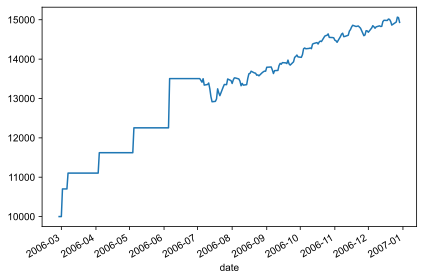

In [13]:
backtester.equity_.dropna().loc['2006-02-25':].plot()

<AxesSubplot:xlabel='date'>

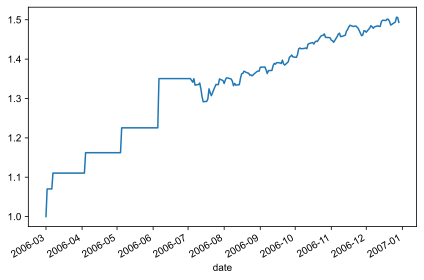

In [14]:
equity_curve(backtester.equity_.dropna().loc['2006-03-01':],initial_value=1).plot()